<a href="https://colab.research.google.com/github/ferborghello/Diplo2022_Grupo16/blob/main/Entregable_Parte_1_FB_Faltan_Graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [ ]:
#Selecciono las columnas con las que quiero trabajar
df1 = df[["salary_monthly_NETO", "tools_programming_languages"]]
df1

,salary_monthly_NETO,tools_programming_languages
0,43000.000,Ninguno
1,63000.000,"HTML, Javascript, Python"
2,127000.000,Ninguno
3,102000.000,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH..."
4,106000.000,"CSS, HTML, Javascript, SQL, TypeScript"
...,...,...
6090,97000.000,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S..."
6091,71000.000,Ninguno de los anteriores
6092,45.753,Ninguno de los anteriores
6093,72.000,"C, C++, HTML, Java, Javascript, PHP, Python, SQL"


In [ ]:
df1.salary_monthly_NETO.describe().round(2)

count       5883.00
mean       94907.95
std        96862.26
min            1.00
25%        51480.00
50%        78000.00
75%       106000.00
max      2080000.00
Name: salary_monthly_NETO, dtype: float64

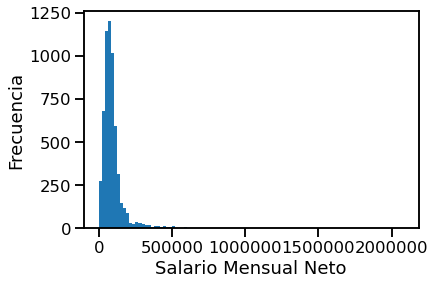

In [ ]:
plt.hist(df1['salary_monthly_NETO'], bins = 100)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Salario Mensual Neto")
plt.ylabel("Frecuencia")
plt.show()

En donde podemos ver un valor minimo en 1 peso y un valor maximo en 2.080.000 pesos, los cuales son salarios mensuales atipicos en Argentina por lo cual decido eliminarlos utilizando el Q25% y el Q75%.

In [ ]:
df25=df1[df1['salary_monthly_NETO'] > df1['salary_monthly_NETO'].quantile(0.25)]
df25_75=df25[df25['salary_monthly_NETO'] < df25['salary_monthly_NETO'].quantile(0.75)]
df_filt = df25_75.reset_index()
df_filt=df_filt[["salary_monthly_NETO", "tools_programming_languages"]]
df_filt

,salary_monthly_NETO,tools_programming_languages
0,63000.0,"HTML, Javascript, Python"
1,102000.0,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH..."
2,106000.0,"CSS, HTML, Javascript, SQL, TypeScript"
3,62400.0,Javascript
4,75000.0,"Javascript, PHP, TypeScript"
...,...,...
3281,82000.0,"Java, PHP, Python, SQL"
3282,56450.0,HTML
3283,97000.0,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S..."
3284,71000.0,Ninguno de los anteriores


HISTOGRAMA FILTRADO

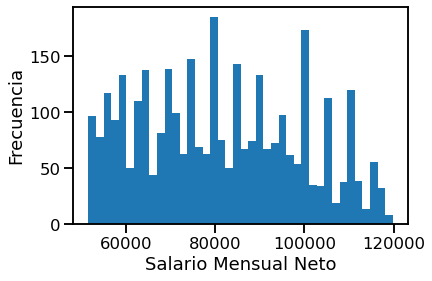

In [ ]:
plt.hist(df_filt['salary_monthly_NETO'], bins = 40)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Salario Mensual Neto")
plt.ylabel("Frecuencia")
plt.show()

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [ ]:
df_filt.tools_programming_languages.head()

0                             HTML, Javascript, Python
1    Bash/Shell, C, CSS, HTML, Java, Javascript, PH...
2               CSS, HTML, Javascript, SQL, TypeScript
3                                           Javascript
4                          Javascript, PHP, TypeScript
Name: tools_programming_languages, dtype: object

Realizo una Limpieza de la columna tools_programming_languages

In [ ]:
df_filt['tools_programming_languages'] = df_filt['tools_programming_languages'].str.lower() # paso todo a minisculas
df_filt['tools_programming_languages'] =df_filt['tools_programming_languages'].replace(['ninguno de los anteriores', 'ninguno'], '')
df_filt['tools_programming_languages'] =df_filt['tools_programming_languages'].replace('', np.nan)
df_filt =df_filt.dropna() #Borro las filas NaN
df_filt = df_filt.reset_index(drop=True)
df_filt=df_filt[["salary_monthly_NETO", "tools_programming_languages"]]
df_filt

,salary_monthly_NETO,tools_programming_languages
0,63000.0,"html, javascript, python"
1,102000.0,"bash/shell, c, css, html, java, javascript, ph..."
2,106000.0,"css, html, javascript, sql, typescript"
3,62400.0,javascript
4,75000.0,"javascript, php, typescript"
...,...,...
2740,70000.0,"bash/shell, css, html, java, javascript, php, ..."
2741,53784.0,"c#, css, html, javascript, python, sql, typesc..."
2742,82000.0,"java, php, python, sql"
2743,56450.0,html


Separo los Lenguajes de programacion en diferentes filas.

In [ ]:
df_sep= df_filt['tools_programming_languages'].str.split(',', expand=True) #separa los lenguajes segun la "," en distintas columnas
df_filt = pd.concat([df_filt,df_sep], axis=1)
df_melt = pd.melt(df_filt, id_vars=['salary_monthly_NETO','tools_programming_languages'], value_vars=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],value_name='Lenguaje')
df_melt =df_melt.dropna()
df_melt

,salary_monthly_NETO,tools_programming_languages,variable,Lenguaje
0,63000.0,"html, javascript, python",0,html
1,102000.0,"bash/shell, c, css, html, java, javascript, ph...",0,bash/shell
2,106000.0,"css, html, javascript, sql, typescript",0,css
3,62400.0,javascript,0,javascript
4,75000.0,"javascript, php, typescript",0,javascript
...,...,...,...,...
37626,73400.0,".net, actionscript, c, c++, c#, cobol, delphi,...",13,smalltalk
39872,101760.0,".net, abap, actionscript, bash/shell, c, c++, ...",14,python
40371,73400.0,".net, actionscript, c, c++, c#, cobol, delphi,...",14,sql
42617,101760.0,".net, abap, actionscript, bash/shell, c, c++, ...",15,sql


In [ ]:
df_final = df_melt[["salary_monthly_NETO", "tools_programming_languages", "Lenguaje"]]
df_final

,salary_monthly_NETO,tools_programming_languages,Lenguaje
0,63000.0,"html, javascript, python",html
1,102000.0,"bash/shell, c, css, html, java, javascript, ph...",bash/shell
2,106000.0,"css, html, javascript, sql, typescript",css
3,62400.0,javascript,javascript
4,75000.0,"javascript, php, typescript",javascript
...,...,...,...
37626,73400.0,".net, actionscript, c, c++, c#, cobol, delphi,...",smalltalk
39872,101760.0,".net, abap, actionscript, bash/shell, c, c++, ...",python
40371,73400.0,".net, actionscript, c, c++, c#, cobol, delphi,...",sql
42617,101760.0,".net, abap, actionscript, bash/shell, c, c++, ...",sql


In [ ]:
leng_cant = df_final.Lenguaje.value_counts().reset_index().rename(columns={'index': 'Lenguaje', 'Lenguaje': 'frecuencia'})
salario_prom = df_final.groupby(['Lenguaje']).mean().round(2).rename(columns={'salary_monthly_NETO': 'Salario_Promedio'})
join = pd.merge(leng_cant, salario_prom, on='Lenguaje', how='inner')
join

,Lenguaje,frecuencia,Salario_Promedio
0,javascript,1115,81415.26
1,sql,1068,81697.93
2,html,804,79475.53
3,python,627,83855.21
4,bash/shell,503,85029.43
...,...,...,...
153,vb 6,1,77407.10
154,clojure,1,103000.00
155,x++,1,86000.00
156,asp,1,100000.00


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

Filtro los Lenguajes que se repiten menos de 10 veces, ya que los considero como una muestra poco representativa

In [ ]:
join_filt = join[join['frecuencia'] > 10]
join_filt.head(10)

,Lenguaje,frecuencia,Salario_Promedio
0,javascript,1115,81415.26
1,sql,1068,81697.93
2,html,804,79475.53
3,python,627,83855.21
4,bash/shell,503,85029.43
5,java,500,83352.62
6,.net,452,80463.54
7,php,416,79980.93
8,typescript,404,82364.87
9,css,367,79173.81


# FALTAN AGREGAR GRAFICOS

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)
